# Web Scrape & EDA

##### Part 1: Web Scrape and build table
##### Part 2: Explanatory Data Analysis
##### Website: www.house.gov
##### Author: Pedro Sanhueza

In [1]:
# Web Scrape
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
# Explanatory Data Analysis
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default='notebook'
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Web Scrape
### https://www.house.gov/representatives

In [2]:
response = requests.get("https://www.house.gov/representatives")
soup = BeautifulSoup(response.text, 'html.parser')

In [3]:
tables = soup.select('table')

In [4]:
rows = []
for table in tables[:56]:
    row = {}
    row['District']             = [x.text.strip() for x in table.select('td')][0::6]
    row['Name']                 = [x.text.strip() for x in table.select('td')][1::6]
    row['Party']                = [x.text.strip() for x in table.select('td')][2::6]
    row['Office Room']          = [x.text.strip() for x in table.select('td')][3::6]
    row['Phone']                = [x.text.strip() for x in table.select('td')][4::6]
    row['Committee Assignment'] = [x.text.strip() for x in table.select('td')][5::6]
    row['State']                = table.select_one('caption').text.strip()
    rows.append(pd.DataFrame(row))

In [5]:
data = pd.concat(rows)
data

,District,Name,Party,Office Room,Phone,Committee Assignment,State
0,1st,"Carl, Jerry L.",R,1330 LHOB,(202) 225-4931,Armed Services|Natural Resources,Alabama
1,2nd,"Moore, Barry",R,1504 LHOB,(202) 225-2901,Agriculture|Veterans' Affairs,Alabama
2,3rd,"Rogers, Mike",R,2469 RHOB,(202) 225-3261,Armed Services,Alabama
3,4th,"Aderholt, Robert",R,266 CHOB,(202) 225-4876,Appropriations,Alabama
4,5th,"Brooks, Mo",R,2185 RHOB,(202) 225-4801,"Armed Services|Science, Space, and Technology",Alabama
...,...,...,...,...,...,...,...
4,5th,"Fitzgerald, Scott",R,1507 LHOB,(202) 225-5101,Education and Labor|Judiciary|Small Business,Wisconsin
5,6th,"Grothman, Glenn",R,1427 LHOB,(202) 225-2476,Budget|Education and Labor|Oversight and Reform,Wisconsin
6,7th,"Tiffany, Thomas P.",R,1719 LHOB,(202) 225-3365,Natural Resources|Judiciary,Wisconsin
7,8th,"Gallagher, Mike",R,1230 LHOB,(202) 225-5665,Armed Services|Intelligence|Transportation and...,Wisconsin


In [ ]:
file_path = '../Representatives - Output/Representatives ' + datetime.now().strftime("%d-%m-%Y %H%M%S") + ".csv" # folder location with file name
data.to_csv(file_path) # save data frame as csv in file location

# Exaplanatory Data Analysis

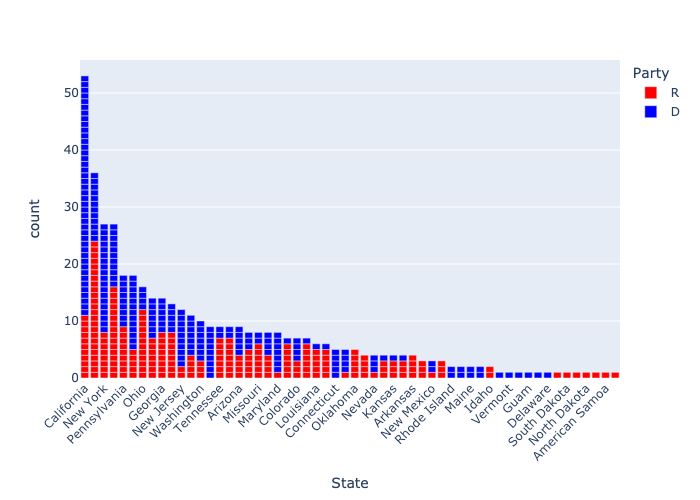

In [22]:
fig = px.bar(data, x='State', color='Party', color_discrete_map={'R': 'red','D': 'blue'})

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_xaxes(tickangle=-45)

newnames = {'R':'Republicans','D':'Democrats'}
# fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
fig.show("png")

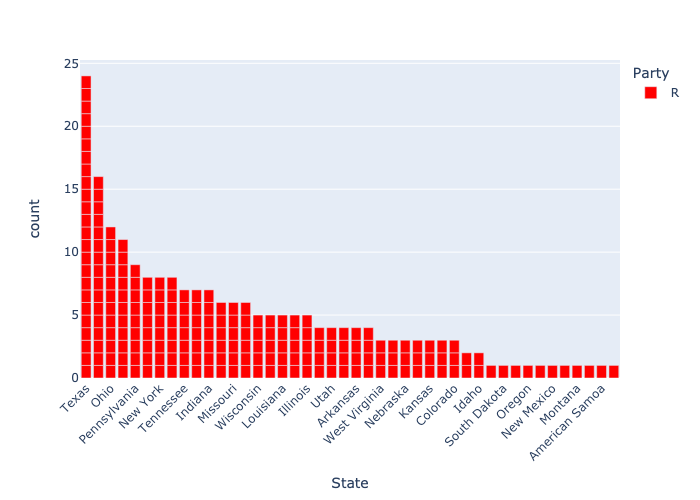

In [23]:
fig = px.bar(data[data.Party=='R'], x='State', color='Party', color_discrete_map={'R': 'red'})

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_xaxes(tickangle=-45)

newnames = {'R':'Republicans'}
# fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
fig.show("png")

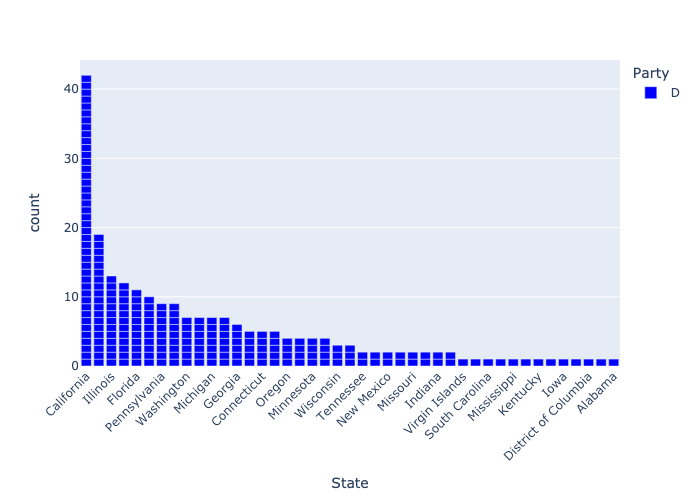

In [24]:
fig = px.bar(data[data.Party=='D'], x='State', color='Party', color_discrete_map={'D': 'Blue'})

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_xaxes(tickangle=-45)

newnames = {'D':'Democrats'}
# fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
fig.show("png")

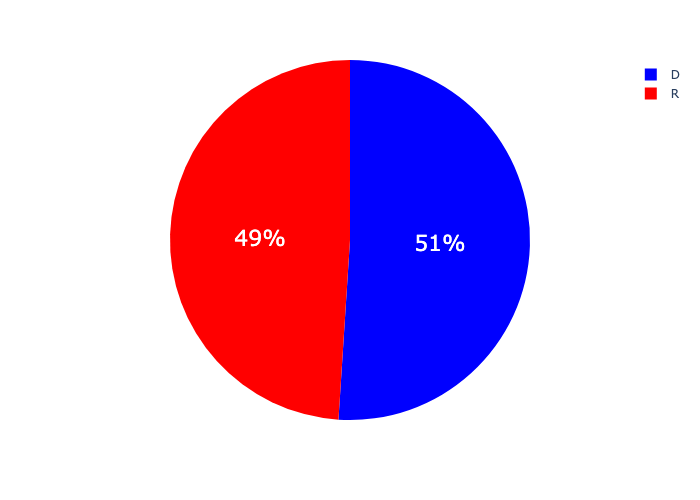

In [25]:
fig = px.pie(data, names='Party', color='Party', color_discrete_map={'R':'Red','D':'Blue'})
fig.update_traces(textfont_size=22)
fig.show("png")

In [10]:
newnames = {'R':'Republicans','D':'Democrats'}
data['Party'].replace(newnames).value_counts().rename_axis('Party').reset_index(name='Representatives')

,Party,Representatives
0,Democrats,225
1,Republicans,216


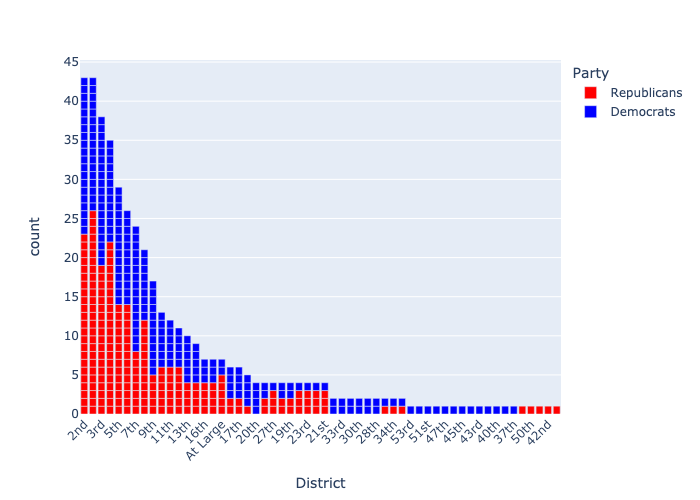

In [26]:
fig = px.bar(data, x='District', color='Party', color_discrete_map={'D': 'Blue', 'R':'Red'})

fig.update_layout(xaxis={'categoryorder':'total descending'})
newnames = {'R':'Republicans','D':'Democrats'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
fig.update_xaxes(tickangle=-45)
fig.show("png")

In [12]:
data_melt_committee = data.copy()
data_melt_committee[[0,1,2,3,4,5]] = data['Committee Assignment'].str.split('|',expand=True)
data_melt_committee.drop('Committee Assignment',axis=1, inplace=True)
data_melt_committee = data_melt_committee.melt(id_vars=['District','Name','Party','Office Room','Phone','State'],value_name='Committee Assignment')
data_melt_committee = data_melt_committee[~data_melt_committee['Committee Assignment'].isnull()].drop('variable',axis=1)


,District,Name,Party,Office Room,Phone,State,Committee Assignment
0,1st,"Carl, Jerry L.",R,1330 LHOB,(202) 225-4931,Alabama,Armed Services
1,2nd,"Moore, Barry",R,1504 LHOB,(202) 225-2901,Alabama,Agriculture
2,3rd,"Rogers, Mike",R,2469 RHOB,(202) 225-3261,Alabama,Armed Services
3,4th,"Aderholt, Robert",R,266 CHOB,(202) 225-4876,Alabama,Appropriations
4,5th,"Brooks, Mo",R,2185 RHOB,(202) 225-4801,Alabama,Armed Services
...,...,...,...,...,...,...,...
1804,19th,"Lofgren, Zoe",D,1401 LHOB,(202) 225-3072,California,Modernization of Congress
1911,13th,"Davis, Rodney",R,2079 RHOB,(202) 225-2371,Illinois,Transportation and Infrastructure
1955,8th,"Raskin, Jamie",D,2242 RHOB,(202) 225-5341,Maryland,Rules
2245,19th,"Lofgren, Zoe",D,1401 LHOB,(202) 225-3072,California,"Science, Space, and Technology"


,index,Committee Assignment
0,Transportation and Infrastructure,68
1,Armed Services,59
2,Appropriations,59
3,Energy and Commerce,58
4,Financial Services,54
5,Foreign Affairs,51
6,Education and Labor,51
7,Agriculture,50
8,Natural Resources,47
9,Oversight and Reform,44


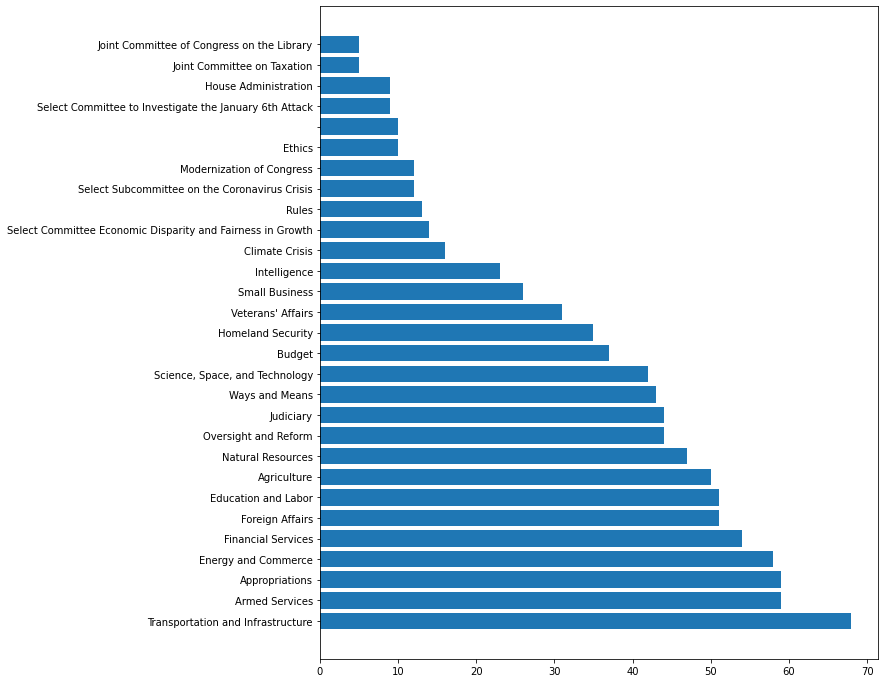

In [15]:
names = data_melt_committee['Committee Assignment'].value_counts().reset_index()['index']
values = data_melt_committee['Committee Assignment'].value_counts().reset_index()['Committee Assignment']

fig, axs = plt.subplots(figsize=(10, 12), sharey=True)
axs.barh(names, values,align='center')

data_melt_committee['Committee Assignment'].value_counts().reset_index()

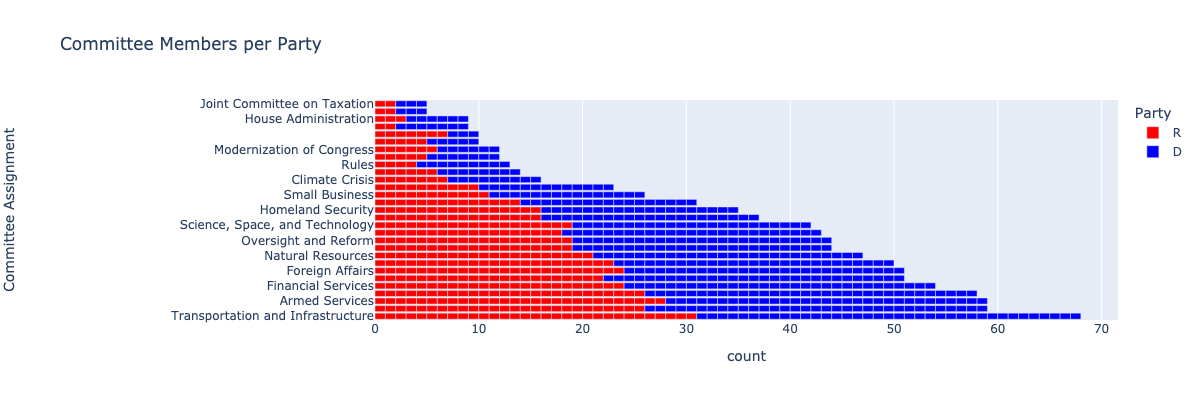

In [36]:
fig = px.bar(
    data_melt_committee,
    y='Committee Assignment',
    color='Party',
    color_discrete_map={'D': 'Blue', 'R':'Red'},
    orientation='h',
    title="Committee Members per Party",
    width=1200, height=400
    )

fig.update_layout(
    yaxis={'categoryorder':'total descending'})

newnames = {'R':'Republicans','D':'Democrats'}

# display
# fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
fig.show("png")